In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
from scipy.io import readsav
from scipy import ndimage
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
# import math
import glob as glob
import seaborn as sns

from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline

# PyMC 4.0 imports
import pymc as pm
import aesara.tensor as at 
import aesara
import arviz as az
import pymc.sampling_jax
import pytensor.tensor as pt
import pytensor

import sys
sys.path.append('../')

from scipy import stats

import os

from funciones.opencube2 import opencube2
from funciones.func4 import tilt,elong,MFLUX,barys,set_ranges
from funciones.modelcube import modelmag,modelmagf,modelmag2


import matplotlib.animation as animation
#animation.rcParams['animation.writer'] = 'ffmpeg'
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['animation.ffmpeg_path'] = u'/home/mpoisson/anaconda3/bin/ffmpeg'  

/home/mpoisson/anaconda3/envs/pymc4/lib/python3.11/site-packages/pymc/sampling/jax.py:39: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


In [127]:
name='10268'
print(name)
datad,times=opencube2(name=name,path='../movies')

mask_cube=np.load('./'+name+'/'+name+'_mask2.npy')
data2=datad[:,:,0:np.shape(mask_cube)[2]]*mask_cube
sz2,sz1,nMagnetograms = (np.shape(data2))
pixsize=1.98*725*1000*100
pixarea=pixsize*pixsize

ranges = set_ranges(data2)
hem=ranges['hem']

10268
163 165 65
b'21-Jan-2003 14:23:59.130' b'25-Jan-2003 22:23:59.170'
67 64


/home/mpoisson/Work/ARSFIT/IAU-pres/../funciones/func4.py:85: RuntimeWarning: invalid value encountered in scalar divide
  xn=np.sum(xv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])
/home/mpoisson/Work/ARSFIT/IAU-pres/../funciones/func4.py:88: RuntimeWarning: invalid value encountered in scalar divide
  yn=np.sum(yv[data<-thr]*data[data<-thr])/np.sum(data[data<-thr])


In [128]:
#DFS=pd.read_csv('./'+name+'/MODELS3.csv')
DF0=pd.read_csv('./'+name+'/MODELT3.csv')
DF02=pd.read_csv('./'+name+'/MODELT_C2_3.csv')
DF03=pd.read_csv('./'+name+'/MODELT_C3_3.csv')
DF04=pd.read_csv('./'+name+'/MODELT_C4_3.csv')
DF08=pd.read_csv('./'+name+'/MODELT_C8_3.csv')
DF10=pd.read_csv('./'+name+'/MODELT_C10_3.csv')

#DFf=pd.read_csv('./'+name+'/MODELTf2.csv')
#DFa=pd.read_csv('./'+name+'/MODELTa2.csv')
#DFaR=pd.read_csv('./'+name+'/MODELTaR3.csv')


listParamNames = ['a','R','da','alpha','N0','axf','xc','yc']
params0={}
params02={}
params03={}
params04={}
params08={}
params10={}


for pp in DF0.keys()[1:-1]:
    params0[pp]=np.array([DF0[DF0['mag']==i][pp].mean() for i in range(nMagnetograms)])
    params02[pp]=np.array([DF02[DF02['mag']==i][pp].mean() for i in range(int(DF02['mag'].max()+1))])
    params03[pp]=np.array([DF03[DF03['mag']==i][pp].mean() for i in range(int(DF03['mag'].max()+1))])
    params04[pp]=np.array([DF04[DF04['mag']==i][pp].mean() for i in range(int(DF04['mag'].max()+1))])
    params08[pp]=np.array([DF08[DF08['mag']==i][pp].mean() for i in range(int(DF08['mag'].max()+1))])
    params10[pp]=np.array([DF10[DF10['mag']==i][pp].mean() for i in range(int(DF10['mag'].max()+1))])
    
    
x0=np.arange(nMagnetograms)
x02=np.arange(0,nMagnetograms,2)
x03=np.arange(0,nMagnetograms,3)
x04=np.arange(0,nMagnetograms,4)
x08=np.arange(0,nMagnetograms,8)
x10=np.arange(0,nMagnetograms,10)

for pp in DF0.keys()[1:-1]:
    x = x02
    y = np.array(params02[pp]) 
    cs = CubicSpline(x, y)
    params02[pp]=cs(x0)
    
for pp in DF0.keys()[1:-1]:
    x = x03
    y = np.array(params03[pp]) 
    cs = CubicSpline(x, y)
    params03[pp]=cs(x0)
    
for pp in DF0.keys()[1:-1]:
    x = x04
    y = np.array(params04[pp]) 
    cs = CubicSpline(x, y)
    params04[pp]=cs(x0)

for pp in DF0.keys()[1:-1]:
    x = x08
    y = np.array(params08[pp]) 
    cs = CubicSpline(x, y)
    params08[pp]=cs(x0)

for pp in DF0.keys()[1:-1]:
    x = x10
    y = np.array(params10[pp]) 
    cs = CubicSpline(x, y)
    params10[pp]=cs(x0)

szy,szx,nn = np.shape(data2)

x1 = np.linspace(0,int((szx-1)), int((szx)))
y1 = np.linspace(0,int((szy-1)), int((szy)))
z1 = np.linspace(0,nMagnetograms-1, nMagnetograms)
xv, yv, zv = np.meshgrid(x1, y1,z1)

modcube0= modelmag(xv,yv,params=params0,hem=hem)
modcube02= modelmag(xv,yv,params=params02,hem=hem)
modcube03= modelmag(xv,yv,params=params03,hem=hem)
modcube04= modelmag(xv,yv,params=params04,hem=hem)
modcube08= modelmag(xv,yv,params=params08,hem=hem)
modcube10= modelmag(xv,yv,params=params10,hem=hem)

ein0=[]
eout0=[]

cubein=[]
cubeout=[]
points=np.sum(mask_cube,axis=2)
nn=np.sum(points > 0)

for xx,cc in [(x02,modcube02),(x03,modcube03),(x04,modcube04),(x08,modcube08),(x10,modcube10)]:

    for i in range(nMagnetograms):
        if i in xx:
            cubein.append((cc[:,:,i]-data2[:,:,i])[points>0])
        else:
            cubeout.append((cc[:,:,i]-data2[:,:,i])[points>0])

    print(np.std(np.ravel(cubein)),np.std(np.ravel(cubeout)))
    ein0.append(np.std(np.ravel(cubein)))
    eout0.append(np.std(np.ravel(cubeout)))

268.0790423509921 269.4247863170458
267.5635865738654 270.8442824364978
267.4986819006194 270.34657075838476
267.62015819405826 270.90851102099975
267.37494781282544 272.25883132394443


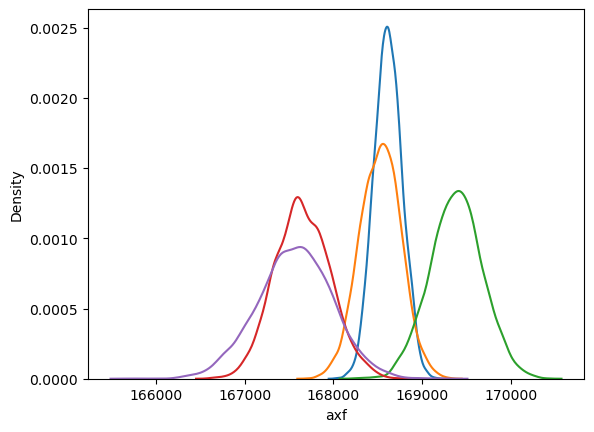

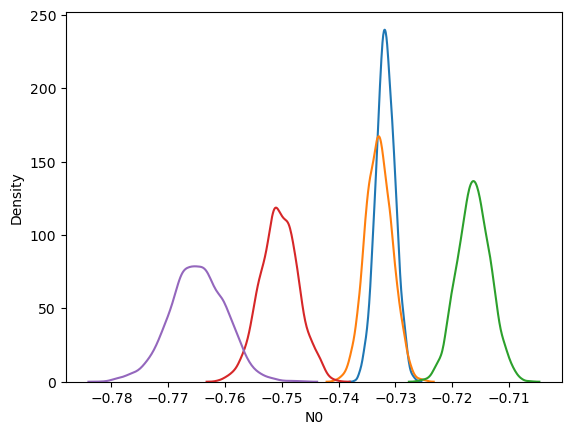

In [129]:
sns.kdeplot(data=DF0[DF0['mag']==0],x='axf')
sns.kdeplot(data=DF02[DF02['mag']==0],x='axf')
sns.kdeplot(data=DF03[DF03['mag']==0],x='axf')
sns.kdeplot(data=DF04[DF04['mag']==0],x='axf')
sns.kdeplot(data=DF08[DF08['mag']==0],x='axf')

plt.show()

sns.kdeplot(data=DF0[DF0['mag']==0],x='N0')
sns.kdeplot(data=DF02[DF02['mag']==0],x='N0')
sns.kdeplot(data=DF03[DF03['mag']==0],x='N0')
sns.kdeplot(data=DF04[DF04['mag']==0],x='N0')
sns.kdeplot(data=DF08[DF08['mag']==0],x='N0')

plt.show()

In [130]:
#DFS=pd.read_csv('./'+name+'/MODELS3.csv')
DF0=pd.read_csv('./'+name+'/MODELTaR3.csv')
DF02=pd.read_csv('./'+name+'/MODELTaR_C2_3.csv')
DF03=pd.read_csv('./'+name+'/MODELTaR_C3_3.csv')
DF04=pd.read_csv('./'+name+'/MODELTaR_C4_3.csv')
DF08=pd.read_csv('./'+name+'/MODELTaR_C8_3.csv')
DF10=pd.read_csv('./'+name+'/MODELTaR_C10_3.csv')

#DFf=pd.read_csv('./'+name+'/MODELTf2.csv')
#DFa=pd.read_csv('./'+name+'/MODELTa2.csv')
#DFaR=pd.read_csv('./'+name+'/MODELTaR3.csv')


listParamNames = ['a','R','da','alpha','N0','axf','xc','yc']
params0={}
params02={}
params03={}
params04={}
params08={}
params10={}


for pp in DF0.keys()[1:-1]:
    params0[pp]=np.array([DF0[DF0['mag']==i][pp].mean() for i in range(nMagnetograms)])
    params02[pp]=np.array([DF02[DF02['mag']==i][pp].mean() for i in range(int(DF02['mag'].max()+1))])
    params03[pp]=np.array([DF03[DF03['mag']==i][pp].mean() for i in range(int(DF03['mag'].max()+1))])
    params04[pp]=np.array([DF04[DF04['mag']==i][pp].mean() for i in range(int(DF04['mag'].max()+1))])
    params08[pp]=np.array([DF08[DF08['mag']==i][pp].mean() for i in range(int(DF08['mag'].max()+1))])
    params10[pp]=np.array([DF10[DF10['mag']==i][pp].mean() for i in range(int(DF10['mag'].max()+1))])
    
    
x0=np.arange(nMagnetograms)
x02=np.arange(0,nMagnetograms,2)
x03=np.arange(0,nMagnetograms,3)
x04=np.arange(0,nMagnetograms,4)
x08=np.arange(0,nMagnetograms,8)
x10=np.arange(0,nMagnetograms,10)

for pp in DF0.keys()[1:-1]:
    x = x02
    y = np.array(params02[pp]) 
    cs = CubicSpline(x, y)
    params02[pp]=cs(x0)
    
for pp in DF0.keys()[1:-1]:
    x = x03
    y = np.array(params03[pp]) 
    cs = CubicSpline(x, y)
    params03[pp]=cs(x0)
    
for pp in DF0.keys()[1:-1]:
    x = x04
    y = np.array(params04[pp]) 
    cs = CubicSpline(x, y)
    params04[pp]=cs(x0)

for pp in DF0.keys()[1:-1]:
    x = x08
    y = np.array(params08[pp]) 
    cs = CubicSpline(x, y)
    params08[pp]=cs(x0)

for pp in DF0.keys()[1:-1]:
    x = x10
    y = np.array(params10[pp]) 
    cs = CubicSpline(x, y)
    params10[pp]=cs(x0)

szy,szx,nn = np.shape(data2)

x1 = np.linspace(0,int((szx-1)), int((szx)))
y1 = np.linspace(0,int((szy-1)), int((szy)))
z1 = np.linspace(0,nMagnetograms-1, nMagnetograms)
xv, yv, zv = np.meshgrid(x1, y1,z1)

modcube0= modelmag(xv,yv,params=params0,hem=hem)
modcube02= modelmag(xv,yv,params=params02,hem=hem)
modcube03= modelmag(xv,yv,params=params03,hem=hem)
modcube04= modelmag(xv,yv,params=params04,hem=hem)
modcube08= modelmag(xv,yv,params=params08,hem=hem)
modcube10= modelmag(xv,yv,params=params10,hem=hem)

ein=[]
eout=[]
cubein=[]
cubeout=[]
points=np.sum(mask_cube,axis=2)
nn=np.sum(points > 0)

for xx,cc in [(x02,modcube02),(x03,modcube03),(x04,modcube04),(x08,modcube08),(x10,modcube10)]:

    for i in range(nMagnetograms):
        if i in xx:
            cubein.append((cc[:,:,i]-data2[:,:,i])[points>0])
        else:
            cubeout.append((cc[:,:,i]-data2[:,:,i])[points>0])

    print(np.std(np.ravel(cubein)),np.std(np.ravel(cubeout)))
    ein.append(np.std(np.ravel(cubein)))
    eout.append(np.std(np.ravel(cubeout)))
    

263.88322918640296 268.6261677682757
263.3800231893236 268.17892813004715
263.2670307263745 267.52322342728587
263.43795967629353 267.8276307733119
263.1265316808676 269.47389907368097


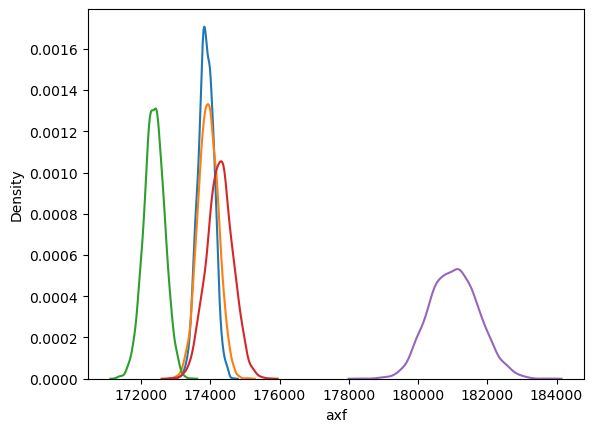

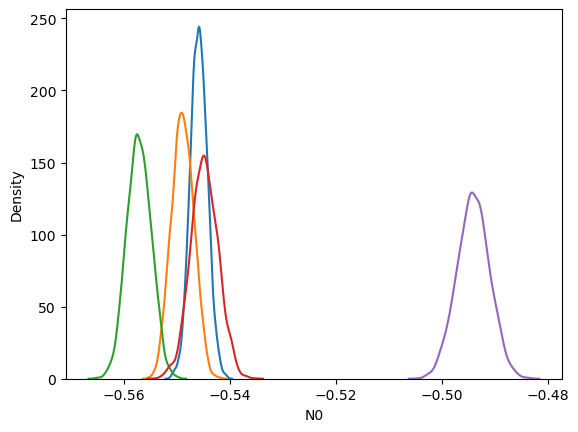

In [131]:
sns.kdeplot(data=DF0[DF0['mag']==0],x='axf')
sns.kdeplot(data=DF02[DF02['mag']==0],x='axf')
sns.kdeplot(data=DF03[DF03['mag']==0],x='axf')
sns.kdeplot(data=DF04[DF04['mag']==0],x='axf')
sns.kdeplot(data=DF08[DF08['mag']==0],x='axf')

plt.show()

sns.kdeplot(data=DF0[DF0['mag']==0],x='N0')
sns.kdeplot(data=DF02[DF02['mag']==0],x='N0')
sns.kdeplot(data=DF03[DF03['mag']==0],x='N0')
sns.kdeplot(data=DF04[DF04['mag']==0],x='N0')
sns.kdeplot(data=DF08[DF08['mag']==0],x='N0')

plt.show()

In [117]:
#DFS=pd.read_csv('./'+name+'/MODELS3.csv')
DF0=pd.read_csv('./'+name+'/MODELS3.csv')
DF02=pd.read_csv('./'+name+'/MODELS_C2_3.csv')
DF03=pd.read_csv('./'+name+'/MODELS_C3_3.csv')
DF04=pd.read_csv('./'+name+'/MODELS_C4_3.csv')
DF08=pd.read_csv('./'+name+'/MODELS_C8_3.csv')
DF10=pd.read_csv('./'+name+'/MODELS_C10_3.csv')

#DFf=pd.read_csv('./'+name+'/MODELTf2.csv')
#DFa=pd.read_csv('./'+name+'/MODELTa2.csv')
#DFaR=pd.read_csv('./'+name+'/MODELTaR3.csv')


listParamNames = ['a','R','da','alpha','N0','axf','xc','yc']
params0={}
params02={}
params03={}
params04={}
params08={}
params10={}


for pp in DF0.keys()[1:-1]:
    params0[pp]=np.array([DF0[DF0['mag']==i][pp].mean() for i in range(nMagnetograms)])
    params02[pp]=np.array([DF02[DF02['mag']==i][pp].mean() for i in range(int(DF02['mag'].max()+1))])
    params03[pp]=np.array([DF03[DF03['mag']==i][pp].mean() for i in range(int(DF03['mag'].max()+1))])
    params04[pp]=np.array([DF04[DF04['mag']==i][pp].mean() for i in range(int(DF04['mag'].max()+1))])
    params08[pp]=np.array([DF08[DF08['mag']==i][pp].mean() for i in range(int(DF08['mag'].max()+1))])
    params10[pp]=np.array([DF10[DF10['mag']==i][pp].mean() for i in range(int(DF10['mag'].max()+1))])
    
    
x0=np.arange(nMagnetograms)
x02=np.arange(0,nMagnetograms,2)
x03=np.arange(0,nMagnetograms,3)
x04=np.arange(0,nMagnetograms,4)
x08=np.arange(0,nMagnetograms,8)
x10=np.arange(0,nMagnetograms,10)

for pp in DF0.keys()[1:-1]:
    x = x02
    y = np.array(params02[pp]) 
    cs = CubicSpline(x, y)
    params02[pp]=cs(x0)
    
for pp in DF0.keys()[1:-1]:
    x = x03
    y = np.array(params03[pp]) 
    cs = CubicSpline(x, y)
    params03[pp]=cs(x0)
    
for pp in DF0.keys()[1:-1]:
    x = x04
    y = np.array(params04[pp]) 
    cs = CubicSpline(x, y)
    params04[pp]=cs(x0)

for pp in DF0.keys()[1:-1]:
    x = x08
    y = np.array(params08[pp]) 
    cs = CubicSpline(x, y)
    params08[pp]=cs(x0)

for pp in DF0.keys()[1:-1]:
    x = x10
    y = np.array(params10[pp]) 
    cs = CubicSpline(x, y)
    params10[pp]=cs(x0)

szy,szx,nn = np.shape(data2)

x1 = np.linspace(0,int((szx-1)), int((szx)))
y1 = np.linspace(0,int((szy-1)), int((szy)))
z1 = np.linspace(0,nMagnetograms-1, nMagnetograms)
xv, yv, zv = np.meshgrid(x1, y1,z1)

modcube0= modelmag(xv,yv,params=params0,hem=hem)
modcube02= modelmag(xv,yv,params=params02,hem=hem)
modcube03= modelmag(xv,yv,params=params03,hem=hem)
modcube04= modelmag(xv,yv,params=params04,hem=hem)
modcube08= modelmag(xv,yv,params=params08,hem=hem)
modcube10= modelmag(xv,yv,params=params10,hem=hem)

eins=[]
eouts=[]
cubein=[]
cubeout=[]
points=np.sum(mask_cube,axis=2)
nn=np.sum(points > 0)

for xx,cc in [(x02,modcube02),(x03,modcube03),(x04,modcube04),(x08,modcube08),(x10,modcube10)]:

    for i in range(nMagnetograms):
        if i in xx:
            cubein.append((cc[:,:,i]-data2[:,:,i])[points>0])
        else:
            cubeout.append((cc[:,:,i]-data2[:,:,i])[points>0])

    print(np.std(np.ravel(cubein)),np.std(np.ravel(cubeout)))
    eins.append(np.std(np.ravel(cubein)))
    eouts.append(np.std(np.ravel(cubeout)))
    

228.92611899163555 235.4942985082922
229.96153969438475 234.0238385715666
228.67084536327266 238.308604049028
226.67069587476237 244.48402683699848
226.78076087090375 242.6595418568531


In [111]:
xx0=[]
for xx in [x02,x03,x04,x08,x10]:
    xx0.append(len(xx))

In [116]:
print(x08,x10)

[ 0  8 16 24] [ 0 10 20 30]


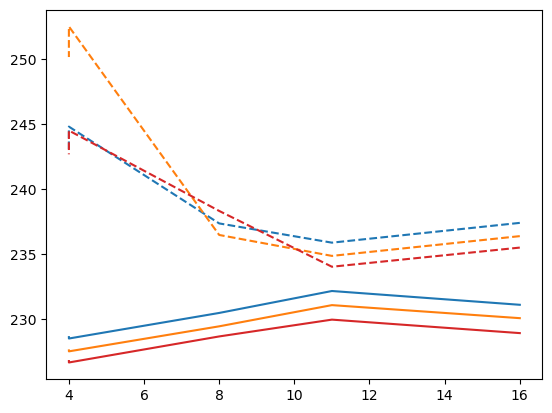

In [118]:
plt.plot(xx0,ein0,color='tab:blue')
plt.plot(xx0,eout0,color='tab:blue',linestyle='dashed')
plt.plot(xx0,ein,color='tab:orange')
plt.plot(xx0,eout,color='tab:orange',linestyle='dashed')
plt.plot(xx0,eins,color='tab:red')
plt.plot(xx0,eouts,color='tab:red',linestyle='dashed')

32

In [133]:
x = x04

y = np.array(params04['da'])

cs = CubicSpline(x, y)

ValueError: The length of `y` along `axis`=0 doesn't match the length of `x`

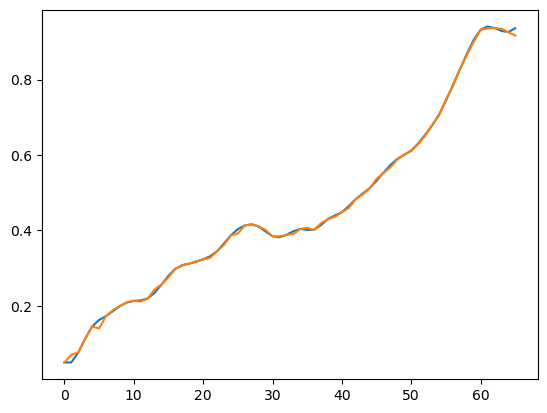

In [35]:
plt.plot(cs(x0))
plt.plot(params0['da'])